<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão logistica**

## **Conceitos importantes**

Antes de partirmos para a regressão propriamente dita, vamos relembrar alguns pontos sobre a regressão linear.

**Regressão Linear**:

- Definição:

  - **A regressão linear** é um método estatístico usado para modelar a relação entre uma variável dependente (ou resposta) e uma ou mais variáveis independentes (ou características).

- Objetivo:

  - O objetivo da regressão linear é prever valores contínuos com base em uma relação linear entre as características e a variável de destino.

- Exemplo:

  - Um exemplo comum de regressão linear é prever o preço de uma casa com base em características como área, número de quartos, localização, etc.

- Saída:

  - A saída de um modelo de regressão linear é um valor contínuo. Por exemplo, o preço previsto de uma casa em dólares.

Agora vamos observar alguns pontos sobre a classificação.

**Classificação**:
- Definição:

  - **A classificação** é um tipo de algoritmo de aprendizado de máquina supervisionado usado para prever a classe de um objeto com base em suas características.
- Objetivo:

  - O objetivo da classificação é separar os pontos de dados em diferentes categorias ou classes usando uma linha reta (ou plano) no espaço de características.

- Exemplo:

  - Um exemplo comum de classificação linear é a classificação de flores em diferentes espécies com base em características como comprimento e largura das pétalas e sépalas.

- Saída:

  - A saída de um modelo de classificação é uma classe ou categoria discreta. Por exemplo, "espécie 1", "espécie 2", etc.



Dessa forma, podemos observar que são técnicas bem distintas uma da outra, partindo desde o seu objetivo até a sua saída.

## **Prática**

Agora que já revisamos e entendemos um pouco mais sobre classificação, vamos aplicar na prática. Para isso, como de costume, vamos importar nossas bibliotecas e nossos dados.

Importante frisar que vamos utilizar uma base de dados referentes ao câncer de mama. Portanto, teremos algumas variáveis, como o tipo do nódulo, informando se ele é benigno ou maligno, tamanho do nódulo, e assim por diante.

### **Carregando os dados**

In [41]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Manipulação de dados
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções estatísticas
import statistics
import scipy.stats

# Machine learning
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

Agora que já importamos todas as bibliotecas necessárias, vamos importar a base de dados propriamente dita.

In [43]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/data_classificacao.csv', index_col=0)

Agora que já carregamos a base de dados, vamos ter um primeiro contato com esses dados.

In [44]:
# Observando os primeiros registros
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Vemos diversas variáveis aqui, que até o momento não sabemos do que se trata. Então, vamos observar o dicionário de dados.


- **id**: Identificação de cada registro na base
- **diagnóstico**: Identificando o tipo de nódulo (M = maligno, B = benigno)

*Colunas 3 a 32*

Dez características de valor real são computadas para cada núcleo celular:

* **raio**: distância do centro aos pontos do perímetro
* **textura**: desvio padrão dos valores da escala de cinza
* **perímetro**: comprimento total da linha que forma a borda do objeto
* **área**: quantidade de espaço dentro dos limites do objeto
* **suavidade**: variação local nos comprimentos dos raios
* **compactação**: perímetro^2 / área - 1,0
* **concavidade**: severidade das porções côncavas do contorno
* **pontos côncavos**: número de porções côncavas do contorno
* **simetria**: medida de quanto um objeto é semelhante a si mesmo após uma transformação
* **dimensão fractal**: "aproximação da costa" - 1





### **Análise rápida dos dados**


Agora que já entendemos um pouco melhor nossos dados, vamos observar o tipo de cada variável para gerarmos um entendimento mais completo dos mesmos.

In [45]:
# Informações sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

Podemos observar que, com exceção da variável 'diagnosis', que neste caso é do tipo categórica, pois possui duas classes, o restante das variáveis são todas do tipo 'float'.

Agora vamos observar mais detalhadamente a variável 'diagnosis', já que ela é nossa variável alvo.

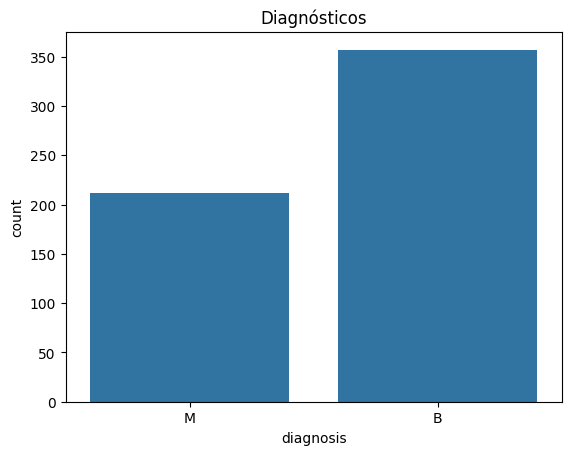

In [46]:
# Criando o gráfico
sns.countplot(data = df, x = 'diagnosis')
plt.title('Diagnósticos')

# Exibindo o gráfico
plt.show()

Dessa forma, podemos observar que a maior parte dos registros na variável 'diagnóstico' é 'B', que representa benigno. É evidente a discrepância entre esses valores, logo podemos assumir que os dados nessa variável estão desbalanceados.

Vamos observar um pouco mais a fundo e aproveitar para eliminar uma variável que não será utilizada.

In [47]:
# Eliminando uma variavel que não será utilizada
df = df.drop('Unnamed: 32', axis = 1)

# Calculando a porcentagem de ocorrências de 'm' em 'diagnosis'
percent_m = round((df['diagnosis'] == 'M').sum() / len(df['diagnosis']) * 100, 2)

# Calculando a porcentagem de ocorrências de 'b' em 'diagnosis'
percent_b = round((df['diagnosis'] == 'B').sum() / len(df['diagnosis']) * 100, 2)

# Calculando o total de diagnósticos
total_diag = len(df['diagnosis'])

# Exibindo a porcentagem
print(f"Total de diagnósticos: {total_diag}\nPorcentagem de diagnósticos benignos: {percent_b}%\nPorcentagem de diagnósticos malignos: {percent_m}%")

Total de diagnósticos: 569
Porcentagem de diagnósticos benignos: 62.74%
Porcentagem de diagnósticos malignos: 37.26%


Como mencionado anteriormente, nossa variável está bastante desbalanceada. Dos 569 diagnósticos, 62,74%, ou seja, 357 deles, são benignos, enquanto os outros 37,26%, representando cerca de 212 registros, são malignos.

É importante destacar que, ao analisarmos nosso modelo, não podemos usar a acurácia como uma métrica precisa, já que os dados de nossa variável alvo não estão balanceados.

Além disso, é importante frisarmos que, embora tenhamos 31 variáveis, todas estão em torno de 10 atributos-chave, diferenciando apenas a perspectiva, como erro padrão ou média. Portanto, é interessante realizarmos algumas análises utilizando apenas essas 10 variáveis desses atributos-chave. Nesse caso, vamos utilizar a média. Dito isso, vamos selecionar as colunas que iremos deletar, mas antes vamos observar a correlação entre elas.

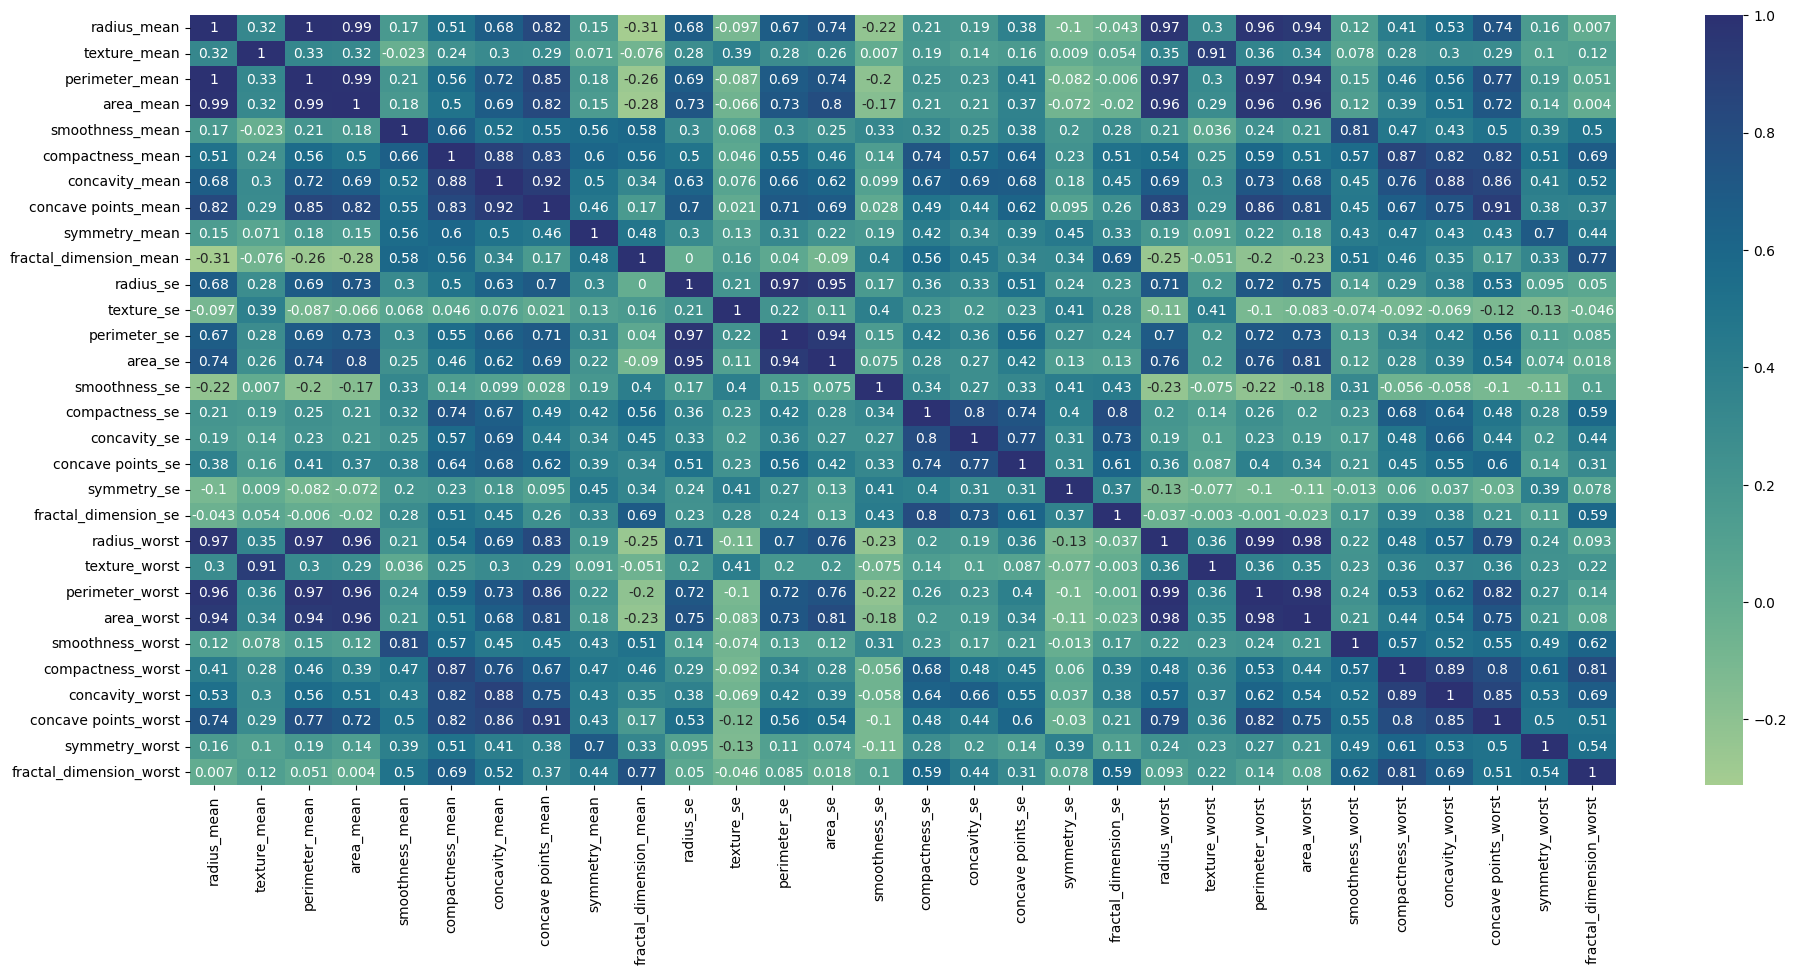

In [48]:
# Selecionando apenas as variáveis numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Define o tamanho da figura
plt.figure(figsize=(23, 10))

# Observando a correlação variável x variável
sns.heatmap(numeric_df.corr().round(3), annot=True, cmap="crest")

# Exibindo a correlação
plt.show()

Dessa forma, podemos observar que diversas variáveis apresentam uma correlação muito forte. Assim, podemos destacar que esses dados provavelmente vão apresentar multicolinearidade em diversos casos. Isso se deve, em boa parte, ao fato de muitas variáveis serem um subconjunto de outras.

Um exemplo claro dessas multicolinearidades é observado na correlação entre 'perimeter_mean' e 'area_mean', que apresentam uma correlação quase perfeita, muito provavelmente porque contêm essencialmente a mesma informação.

Portanto, será necessário realizarmos exclusões de algumas variáveis. Nesse caso, vamos utilizar como referência a média. Mas como realizaremos essa exclusão? Bem, primeiramente, vamos excluir as variáveis que possuem informação 'worst', pois são um subconjunto da média. Após isso, vamos eliminar as variáveis relacionadas a perímetro e área, e em seguida, alguns atributos da concavidade. Assim como a média, utilizaremos o atributo de compacidade, e o atributo de concavidade é um subconjunto da compacidade.

In [49]:
# Eliminando todas as colunas "piores"
cols = ['radius_worst',
        'texture_worst',
        'perimeter_worst',
        'area_worst',
        'smoothness_worst',
        'compactness_worst',
        'concavity_worst',
        'concave points_worst',
        'symmetry_worst',
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

# Eliminando todas as colunas relacionadas aos atributos "perímetro" e "área"
cols = ['perimeter_mean',
        'perimeter_se',
        'area_mean',
        'area_se']
df = df.drop(cols, axis=1)

# Eliminando todas as colunas relacionadas aos atributos "concavidade" e "pontos côncavos"
cols = ['concavity_mean',
        'concavity_se',
        'concave points_mean',
        'concave points_se']

# Realizandoa  exlcusão
df = df.drop(cols, axis=1)

# Verificando as colunas remanescentes
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

Agora vamos observar a correlação das variáveis restantes.

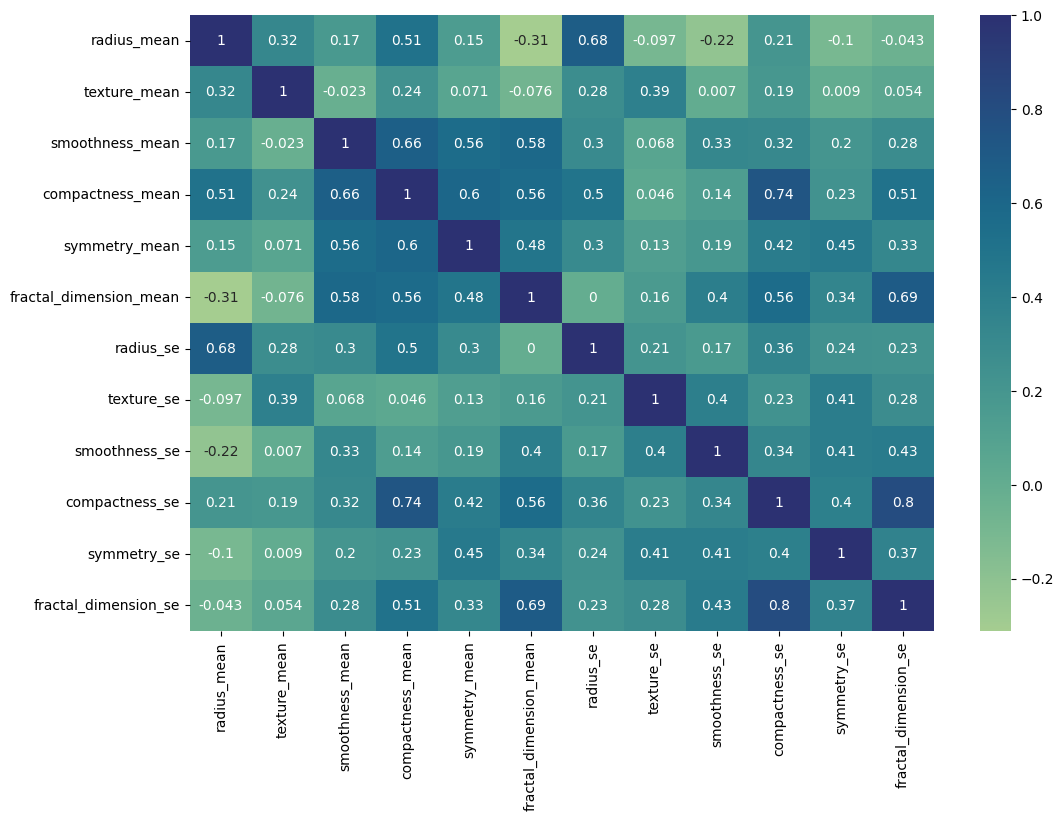

In [50]:
# Selecionando apenas as variáveis numéricas
numeric2_df = df.select_dtypes(include=[np.number])

# Define o tamanho da figura
plt.figure(figsize=(12, 8))

# Observando a correlação variável x variável
sns.heatmap(numeric2_df.corr().round(3), annot=True, cmap="crest")

# Exibindo a correlação
plt.show()

Aqui podemos observar nossa correlação bem mais enxuta e sem a maior parte das multicolinearidades. Basicamente, quando tínhamos variáveis com uma correlação muito forte, tiramos uma das duas variáveis para evitar multicolinearidade. Dito isso, podemos seguir adiante.


### **Machine Learning**

Agora vamos começar a criação do nosso modelo propriamente dito, mas antes vamos separar os nossos dados entre treino e teste.


In [51]:
# Definindo as variáveis independentes
X = df.drop(['diagnosis'], axis = 1)

# Definindo nossa variável alvo
y = df['diagnosis']

# Dividindo nossos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

Agora que já realizamos a divisão dos nossos dados, vamos criar a fórmula para aplicação da regressão logística.

In [52]:
# Obtendo os nomes das colunas e excluindo 'diagnosis'
cols = df.columns.drop('diagnosis')

# Construindo a fórmula para a regressão, onde 'diagnosis' é a variável dependente e todas as outras colunas são variáveis independentes
formula = 'diagnosis ~ ' + ' + '.join(cols)

# Imprimindo a fórmula gerada
print(formula, '\n')

diagnosis ~ radius_mean + texture_mean + smoothness_mean + compactness_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + compactness_se + symmetry_se + fractal_dimension_se 



Agora que já criamos a fórmula, vamos aplicá-la no nosso modelo.


In [71]:
# Criando o modelo de regressão logística usando a fórmula especificada, os dados de treinamento e a distribuição binomial
model = smf.glm(formula=formula, data=X_train.join(y_train), family=sm.families.Binomial())

# Ajustando o modelo aos dados de treinamento
logistic_fit = model.fit()

# Imprimindo um resumo dos resultados do ajuste
print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  398
Model:                                          GLM   Df Residuals:                      385
Model Family:                              Binomial   Df Model:                           12
Link Function:                                Logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -41.989
Date:                              Mon, 22 Apr 2024   Deviance:                       83.979
Time:                                      20:13:21   Pearson chi2:                     127.
No. Iterations:                                  10   Pseudo R-squ. (CS):             0.6709
Covariance Type:                          nonrobust                                         
                             coef    std err          z      P>|z|    

Essa não é a fórmula mais utilizada para avaliarmos nosso modelo. No entanto, aqui podemos conseguir algumas informações importantes a respeito das nossas variáveis que compõem o mesmo. Dito isso, vamos analisar alguns pontos importantes:

- O Pseudo R-quadrado não vai nos dizer muita coisa, pois estamos lidando com uma variável alvo desbalanceada. Portanto, para termos uma maior segurança a respeito do desempenho do nosso modelo, é mais interessante utilizarmos a matriz de confusão.

- Algumas variáveis não estão auxiliando o nosso modelo, como por exemplo as variáveis 'compactness_mean', 'smoothness_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se' e 'compactness_se'. É interessante observarmos o desempenho de um modelo mais simples retirando essas variáveis. Como a fractal_dimension_se está bem próxima de ultrapassar nosso p-valor, vou retirá-la também. Tomei essa decisão após realizar o teste de um modelo com essa variável e perceber que realmente ela não contribuiu para o mesmo.

- Antes de retirarmos essas variáveis que não estão auxiliando o nosso modelo, apenas para comparação, vamos realizar as previsões utilizando esse modelo. Logo após, iremos criar um modelo mais simplificado retirando as variáveis que não vão nos auxiliar.

#### **Criação do modelo**

É importante lembrarmos que em nossos dados a probabilidade de 1 corresponde à classe 'benigna', enquanto 0 corresponde à classe 'maligna'. Assim que rodarmos o nosso modelo, ele nos informará uma probabilidade entre 0 e 1. Logo, podemos definir que quanto mais próximo de 0, poderemos adicionar um rótulo de 'M', e quanto mais próximo de 1, iremos adicionar um rótulo de 'B'. Definiremos um limite de 0.5; a partir desse valor, quanto mais perto de 0 ou 1, adicionaremos o seu respectivo rótulo.

In [62]:
# Realizando as previsões nos dados de teste
predictions = logistic_fit.predict(X_test)

# Exibindo algumas predições
predictions

id
906564      0.094671
85715       0.503381
891670      0.999951
874217      0.013275
905680      0.234305
              ...   
844359      0.000354
913505      0.000017
84610002    0.014715
8910506     0.999427
906290      0.999929
Length: 171, dtype: float64

Como podemos observar, o primeiro registro tem 90% de chance de ser benigno, logo ele tem 10% de chance de ser maligno, enquanto o segundo registro tem 49% de chance de ser benigno e 51% de chance de ser maligno, e assim sucessivamente.

Podemos concluir então que o nosso modelo nos dá a probabilidade de determinado registro pertencer à classe 1, que nesse caso é a classe 'benigna'.

Aqui temos um pequeno problema, pois nosso resultado é numérico e precisamos converter o mesmo para uma classe nominal. Então, é isso que faremos a seguir.

In [55]:
# Se a probabilidade de ser benigno for maior que 50%, atribuir "B", senão, atribuir "M"
predictions_nominal = ["M" if x < 0.5 else "B" for x in predictions]

Com as conversões concluídas, podemos seguir adiante para a avaliação do nosso modelo.

#### **Avaliação o modelo**

Aqui vamos utilizar algumas métricas como a matriz de confusão para analisarmos a performance do nosso modelo.

In [56]:
# Importando as métricas necessárias
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

# Calculando a matriz de confusão
cfm = confusion_matrix(y_test, predictions_nominal)

# Extrair os valores da matriz de confusão
tn = cfm[0][0]  # Verdadeiros negativos
fp = cfm[0][1]  # Falsos positivos
fn = cfm[1][0]  # Falsos negativos
tp = cfm[1][1]  # Verdadeiros positivos

# Calculando as métricas
balanced_accuracy = balanced_accuracy_score(y_test, predictions_nominal)
accuracy = accuracy_score(y_test, predictions_nominal)
sensibilidade = tp / (tp + fn)  # Sensibilidade = recall = acertos da classe 1
especificidade = tn / (tn + fp)  # Especificidade = acertos da classe 0

# Imprimindo as métricas
print('Confusion Matrix: \n', cfm, '\n')
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)
print('\nBalanced accuracy: \n', balanced_accuracy, '\n')
print('Accuracy: \n', accuracy, '\n')
print('Sensitivity: \n', sensibilidade, '\n')
print('Especificidade: \n', especificidade, '\n')

Confusion Matrix: 
 [[98 10]
 [10 53]] 

True Negative: 98
False Positive: 10
False Negative: 10
True Positive: 53

Balanced accuracy: 
 0.8743386243386244 

Accuracy: 
 0.8830409356725146 

Sensitivity: 
 0.8412698412698413 

Especificidade: 
 0.9074074074074074 



Como resultado do nosso modelo, obtivemos uma acurácia balanceada de 87%, ficando bem próximo da acurácia normal. No entanto, vale lembrar que a acurácia balanceada leva em consideração o desbalanceamento da nossa variável alvo, ou seja, nosso modelo está classificando corretamente cerca de 87% de ambas as classes. Com uma sensibilidade de 84%, nosso modelo está classificando corretamente cerca de 84% das classes positivas, e como a especificidade é de 90%, então nosso modelo consegue classificar corretamente cerca de 90% da classe 0.

#### **Modelo sem as variaveis que não são importantes**

Agora vamos criar um modelo sem utilizar aquelas variáveis que vimos anteriormente não contribuindo significativamente para o nosso modelo.

In [72]:
# Obtendo os nomes das colunas e excluindo 'diagnosis'
cols2 = df.columns.drop(['diagnosis', 'compactness_mean', 'smoothness_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'fractal_dimension_se'])

# Construindo a fórmula para a regressão, onde 'diagnosis' é a variável dependente e todas as outras colunas são variáveis independentes
formula2 = 'diagnosis ~ ' + ' + '.join(cols2)

# Imprimindo a fórmula gerada
print(formula2, '\n')

diagnosis ~ radius_mean + texture_mean + symmetry_mean + radius_se + symmetry_se 



Agora que já definimos nosso modelo utilizando apenas as variáveis que realmente estão contribuindo para o mesmo, vamos observar o modelo em ação.

In [73]:
# Criando o modelo de regressão logística usando a fórmula especificada, os dados de treinamento e a distribuição binomial
model2 = smf.glm(formula=formula2, data=X_train.join(y_train), family=sm.families.Binomial())

# Ajustando o modelo aos dados de treinamento
logistic_fit2 = model2.fit()

# Imprimindo um resumo dos resultados do ajuste
print(logistic_fit2.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  398
Model:                                          GLM   Df Residuals:                      392
Model Family:                              Binomial   Df Model:                            5
Link Function:                                Logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -58.716
Date:                              Mon, 22 Apr 2024   Deviance:                       117.43
Time:                                      20:15:41   Pearson chi2:                     165.
No. Iterations:                                   9   Pseudo R-squ. (CS):             0.6421
Covariance Type:                          nonrobust                                         
                    coef    std err          z      P>|z|      [0.025 

Agora vamos realizar as previsões.

In [74]:
# Realizando as previsões nos dados de teste
predictions2 = logistic_fit2.predict(X_test)

# Exibindo o resultado
predictions2

id
906564      0.449519
85715       0.528363
891670      0.998333
874217      0.014719
905680      0.029601
              ...   
844359      0.001231
913505      0.000229
84610002    0.105156
8910506     0.983767
906290      0.999394
Length: 171, dtype: float64

Com as previsões realizadas, vamos alterar os valores para o tipo nominal.



In [75]:
# Se a probabilidade de ser benigno for maior que 50%, atribuir "B", senão, atribuir "M"
predictions_nominal2 = ["M" if x < 0.5 else "B" for x in predictions2]

Agora que já realizamos as previsões e também as conversões, podemos observar as métricas desse nosso novo modelo.

In [76]:
# Calculando a matriz de confusão
cfm2 = confusion_matrix(y_test, predictions_nominal2)

# Extrair os valores da matriz de confusão
tn = cfm2[0][0]  # Verdadeiros negativos
fp = cfm2[0][1]  # Falsos positivos
fn = cfm2[1][0]  # Falsos negativos
tp = cfm2[1][1]  # Verdadeiros positivos

# Calculando as métricas
balanced_accuracy2 = balanced_accuracy_score(y_test, predictions_nominal2)
accuracy2 = accuracy_score(y_test, predictions_nominal2)
sensibilidade2 = tp / (tp + fn)  # Sensibilidade = recall = acertos da classe 1
especificidade2 = tn / (tn + fp)  # Especificidade = acertos da classe 0

# Imprimindo as métricas
print('Confusion Matrix: \n', cfm2, '\n')
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)
print('\nBalanced accuracy: \n', balanced_accuracy2, '\n')
print('Accuracy: \n', accuracy2, '\n')
print('Sensitivity: \n', sensibilidade2, '\n')
print('Especificidade: \n', especificidade2, '\n')

Confusion Matrix: 
 [[100   8]
 [  9  54]] 

True Negative: 100
False Positive: 8
False Negative: 9
True Positive: 54

Balanced accuracy: 
 0.8915343915343915 

Accuracy: 
 0.9005847953216374 

Sensitivity: 
 0.8571428571428571 

Especificidade: 
 0.9259259259259259 



Tivemos uma pequena melhora, dito isso podemos tirar as seguintes conclusões do nosso melhor modelo:

Conseguimos uma acurácia balanceada de 89%, indicando que o nosso modelo acerta em média cerca de 89% das nossas duas classes.

Observando a sensibilidade, podemos perceber que nosso modelo classifica corretamente 85% das vezes a classe 1.

A especificidade está indicando que o nosso modelo classifica corretamente cerca de 92% das vezes em que a nossa classe é 0.